# Projeto de Ciência de Dados
### Previsão de Vendas

O desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios em 3 grandes redes que uma determinada empresa irá investir: TV, Jornal, Rádio.

# Passo a passo do Projeto

* Entendimento do Desafio proposto
* Entendimento da Área/Empresa
* Extração dos Dados
* Ajuste dos Dados (Tratamento/Limpeza)
* Análise Exploratória
* Modelagem + Algorítmo
* Interpretação dos Resultados

In [57]:
# Importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
# Importando banco de dados
tabela = pd.read_csv('advertising.csv')
tabela

# TV --> Investimentos que foram feitos ao longo dos meses de propaganda na televisão
# Rádio --> Investimento que foram feitos ao longo dos meses em rádio
# Jornal --> Investimento que foram feitos ao longo dos meses de propaganda em Jornal
# Vendas --> Vendas feitas depois dos investimentos

# Com essas informações vemos que foram feitos investimentos altíssimos e vendas muito baixa
# se esses dados fossem reais a empresa já estaria fechada

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [9]:
# 5 primeiras linhas
tabela.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
# 5 últimas linhas
tabela.tail()

,TV,Radio,Jornal,Vendas
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [8]:
# Estraindo informações
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# Extraindo a quantidade de linhas e colunas
print(f'Linhas: {tabela.shape[0]}')
print(f'Colunas: {tabela.shape[1]}')

Linhas: 200
Colunas: 4


In [13]:
# Extraindo informações estatísticas
tabela.describe().T   # Esse (.T) no final é para mostrar as informações na horizontal

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Jornal,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Vendas,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


# Análise Exploratória
* Vamos tentar visualizar como as informações estão distribuídas
* Vamos ver a correlação entre os itens

In [14]:
# Entender se no mês em que mais foi investido em TV, vendeu mais...
# Entender se no mês em que mais foi investido em Rádio, vendeu mais...
# Assim por diante. Entender se há uma relação entre as informações.

# CALCULANDO CORRELAÇÃO
tabela.corr()

# Olhando essas informações parece que quanto mais investe em TV mais cresce as vendas
# não podemos dar certeza porque é necessário análisar todas as informações antes

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


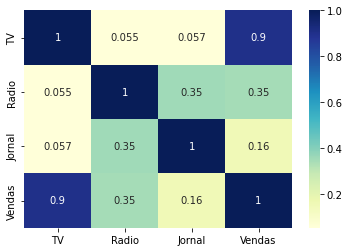

In [24]:
# Colocando as informações acima em um gráfico de calor
sns.heatmap(tabela.corr(), annot=True, cmap='YlGnBu')
plt.show()

# annot=True --> Mostra as informações (valores) no gráfico, se deixar sem só mostra as cores
# cmap='Wistia' --> Adiciona escala de cor no gráfico, tem outras escalas de cor na documentação

# Treinando o Modelo de Machine Learning
Separando a base de dados em:
* X para teste
* X para treino
* Y para teste
* Y para treino

**X** --> O resto da base de dados que será usado para previsão

**Y** --> Quem você irá fazer a previsão

In [58]:
y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']]
# Quando seleciona mais de uma coluna tem que colocar [[]] 2 colchetes

# Passando os parâmetros para teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)
# Irá pegar a base de dados e dividir em 4 partes

In [60]:
# Criando a Inteligência Artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criando Modelo
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [61]:
# Treinando os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

# Testando os Modelos

In [62]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9633048302352036


# Visualizando Gráfico das Previsões

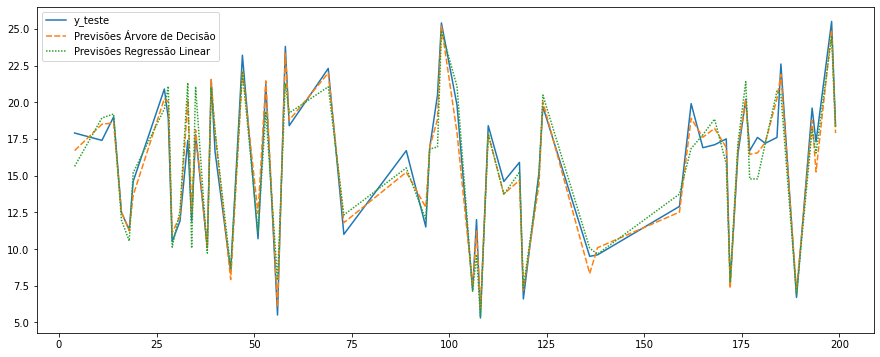

In [65]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsões Árvore de Decisão'] = previsao_arvoredecisao
tabela_auxiliar['Previsões Regressão Linear'] = previsao_regressaolinear

plt.figure(figsize=(15, 6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

# Fazendo uma nove Previsão